In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

In [53]:
df = pd.read_csv("../data/student_exam_scores.csv")

In [54]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [55]:
""" Goal: To predict exam score, it's a continous value so we can choose the model accordingly

 Models that can be used:
 - Linear Regression -> Great for identifying the simple linear relationship between the features and the target
 - Decision Tree or Random Forest -> These models mostly capture the non linear relationship between the features and the target could be preferred if the data is complex, prone to overfitting
 -XGBoost or a SVR could be a overkill

 Models to be used -> 
 Linear Regression, Decision Tree and Random Forset
 """

" Goal: To predict exam score, it's a continous value so we can choose the model accordingly\n\n Models that can be used:\n - Linear Regression -> Great for identifying the simple linear relationship between the features and the target\n - Decision Tree or Random Forest -> These models mostly capture the non linear relationship between the features and the target could be preferred if the data is complex, prone to overfitting\n -XGBoost or a SVR could be a overkill\n\n Models to be used -> \n Linear Regression, Decision Tree and Random Forset\n "

In [56]:
df.drop(axis=1, columns='student_id', inplace=True) # Doesn't contribute anything to the exam score

In [57]:
df.tail()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0
199,10.2,6.3,97.4,68,37.8


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_studied       200 non-null    float64
 1   sleep_hours         200 non-null    float64
 2   attendance_percent  200 non-null    float64
 3   previous_scores     200 non-null    int64  
 4   exam_score          200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [59]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [60]:
df.isnull().sum()

hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [61]:
df.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Comparision between Hours, Sleep and Score')

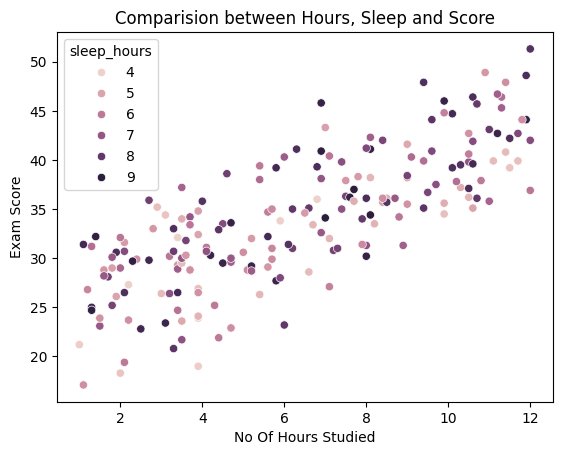

In [62]:
plt.Figure(figsize=(14,9))
sns.scatterplot(data=df, x='hours_studied', y='exam_score', hue='sleep_hours')
plt.xlabel("No Of Hours Studied")
plt.ylabel("Exam Score")
plt.title("Comparision between Hours, Sleep and Score")

Text(0.5, 1.0, 'Exam Score Vs Attendance')

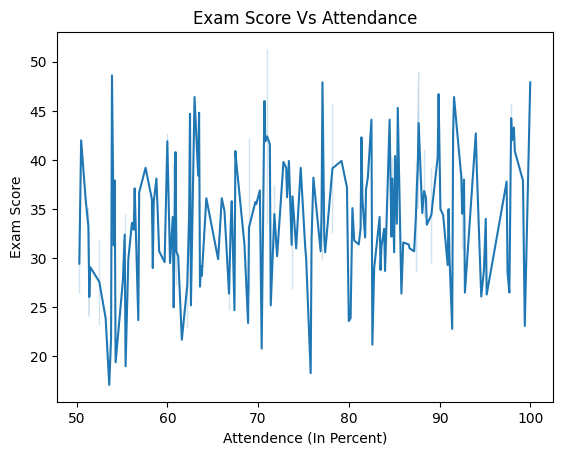

In [63]:
plt.Figure(figsize=(30,12))
sns.lineplot(data=df, x='attendance_percent', y='exam_score')
plt.xlabel("Attendence (In Percent)")
plt.ylabel("Exam Score")
plt.title("Exam Score Vs Attendance")

Text(0.5, 1.0, 'Exam Score Vs Attendance')

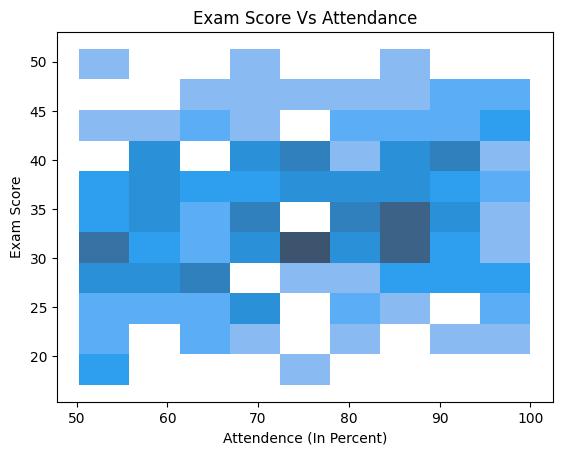

In [64]:
plt.Figure(figsize=(30,12))
sns.histplot(data=df, x='attendance_percent', y='exam_score')
plt.xlabel("Attendence (In Percent)")
plt.ylabel("Exam Score")
plt.title("Exam Score Vs Attendance")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3156ec18e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3156ec1e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3156ee9c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3156ec0980>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3156ec0440>],
 'means': []}

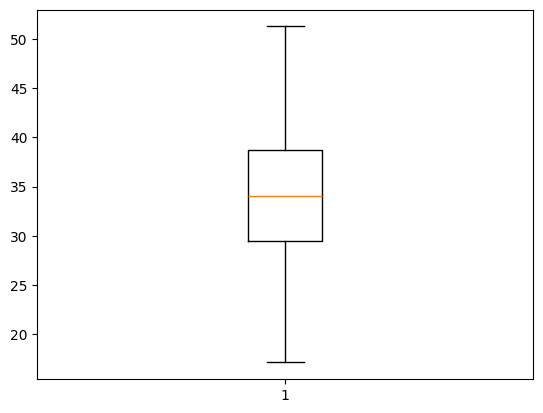

In [69]:
plt.boxplot(data=df, x='exam_score')

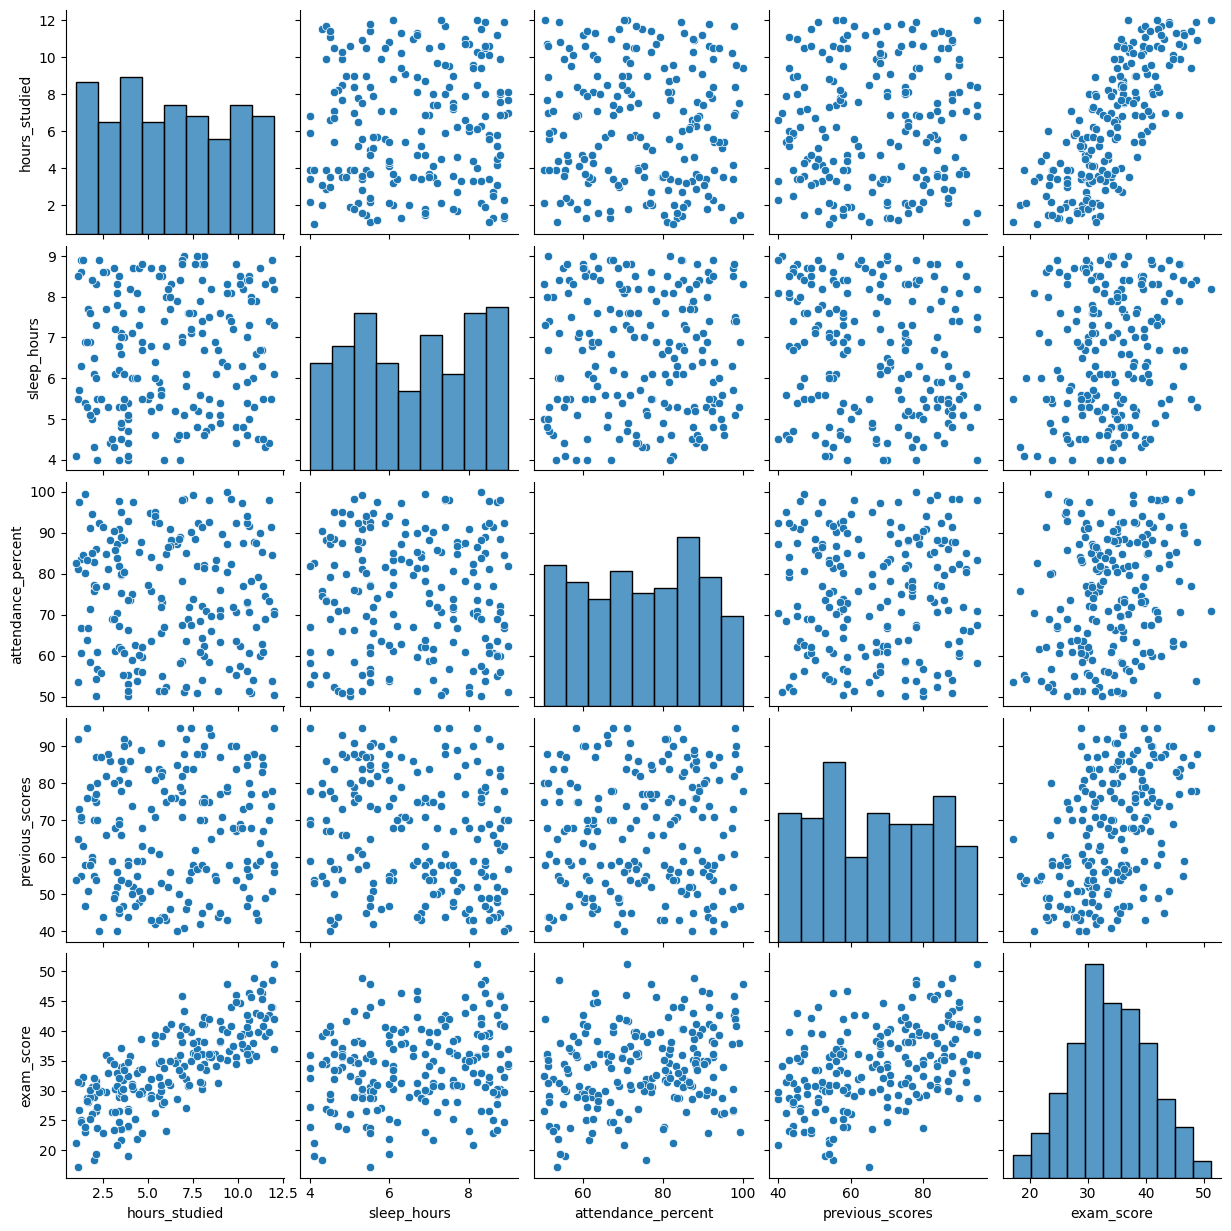

In [ ]:
sns.pairplot(df)

<Axes: >

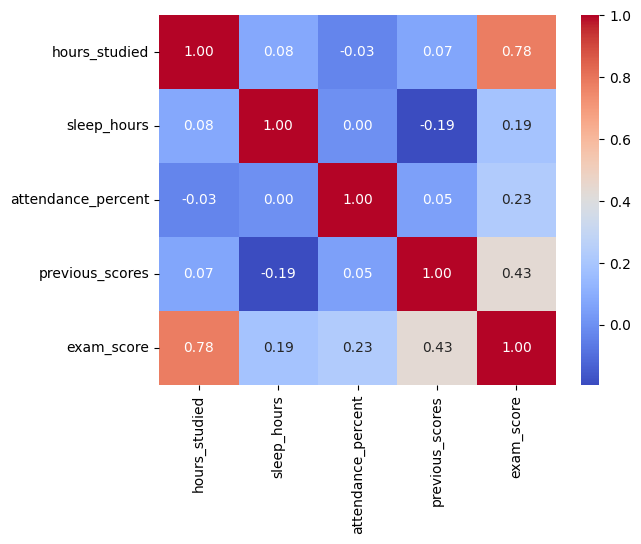

In [71]:
corr = df.corr()
sns.heatmap(data=corr, cmap='coolwarm', fmt='.2f', annot=True)

In [ ]:
X = df.drop(columns='exam_score')
y = df['exam_score']

In [ ]:
X.shape

(200, 4)

In [ ]:
y.shape

(200,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [66]:
models = {
    "LR":LinearRegression(),
    "DTR": DecisionTreeRegressor(),
    "RFR": RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2Score = r2_score(y_test, y_pred)

    print(f"Model Name: {name}")
    print(f"  R2 Score: {r2Score:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print(f"  Mean Squared Error: {mse:.4f}")

Model Name: LR
  R2 Score: 0.8537
  Mean Absolute Error: 2.3109
  Mean Squared Error: 7.7618
Model Name: DTR
  R2 Score: 0.5097
  Mean Absolute Error: 4.3250
  Mean Squared Error: 26.0200
Model Name: RFR
  R2 Score: 0.8015
  Mean Absolute Error: 2.8763
  Mean Squared Error: 10.5368


In [72]:
LR = LinearRegression()
LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
scores = cross_val_score(LR, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-validation R² scores: [0.79847262 0.82686954 0.8552843  0.85676892 0.80607486]
Mean R²: 0.8286940493240358


In [74]:
from joblib import dump
dump(LR, 'ExamScore.pkl')

['ExamScore.pkl']